In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('AB_NYC_cleaned.csv')

In [3]:
df.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9           0.210000   
1    225               1                 45           0.380000   
2    150               3                  0           1.373221   
3     89               1                270           4.640000   
4     80              10                  9           0.100000   

   calculated_host_listings_count  availability_365  name_len  
0                               6               365        34  
1                               2               355        21  
2                               1               365        35  
3                               1               194        31  
4                               1                 0        48

In [4]:
df.shape

(48879, 14)

In [5]:
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_len'],
      dtype='object')

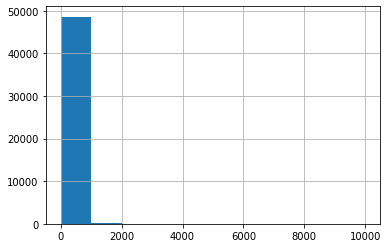

In [6]:
df.price.hist()

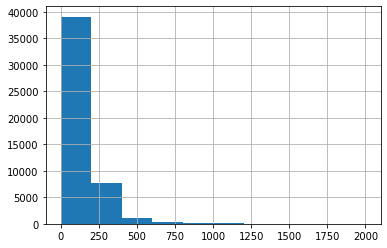

In [7]:
df["price"][df.price < 2000].hist()

In [8]:
df[df.price > 2000]

name    host_id  \
946                 Beautiful 3 bedroom in Manhattan     256239   
1862                Sunny, Family-Friendly 2 Bedroom    4289240   
2018      Architecturally Stunning Former Synagogue!    4751930   
2698             Beautiful 1 Bedroom in Nolita/Soho      213266   
3536              UWS 1BR w/backyard + block from CP    2151325   
...                                              ...        ...   
45851    bay ridge & sunset park furnished apartment  263564234   
46517                      Amazing Chelsea 4BR Loft!  256649546   
46598                 Northside Williamsburg Stunner     956324   
48027   Luxury TriBeCa Apartment at an amazing price  271248669   
48288  Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   

      neighbourhood_group     neighbourhood  latitude  longitude  \
946             Manhattan   Upper West Side  40.80142  -73.96931   
1862             Brooklyn  Prospect Heights  40.67919  -73.97191   
2018            Manhattan      East Village  40.72668  -73.98179   
2698            Manhattan            Nolita  40.72193  -73.99379   
3536            Manhattan   Upper West Side  40.77782  -73.97848   
...                   ...               ...       ...        ...   
45851            Brooklyn         Bay Ridge  40.63087  -74.02006   
46517           Manhattan           Chelsea  40.73999  -73.99806   
46598            Brooklyn      Williamsburg  40.71705  -73.96470   
48027           Manhattan           Tribeca  40.71206  -74.00999   
48288           Manhattan    Hell's Kitchen  40.75533  -73.99866   

             room_type  price  minimum_nights  number_of_reviews  \
946       Private room   3000               7                  0   
1862   Entire home/apt   4000               4                  0   
2018   Entire home/apt   2500              30                 15   
2698   Entire home/apt   5000               1                  2   
3536   Entire home/apt   6000              14                 17   
...                ...    ...             ...                ...   
45851  Entire home/apt   4200              60                  0   
46517  Entire home/apt   2995              30                  1   
46598  Entire home/apt   4500              30                  0   
48027  Entire home/apt   6500             180                  0   
48288  Entire home/apt   2999              30                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
946             1.373221                               1               365   
1862            1.373221                               1                83   
2018            0.260000                               1                89   
2698            0.030000                               1               365   
3536            0.270000                               1               359   
...                  ...                             ...               ...   
45851           1.373221                               1                90   
46517           1.000000                               1               214   
46598           1.373221                               1               365   
48027           1.373221                               1               365   
48288           1.373221                               1               222   

       name_len  
946          32  
1862         32  
2018         42  
2698         35  
3536         34  
...         ...  
45851        43  
46517        25  
46598        30  
48027        44  
48288        45  

[86 rows x 14 columns]

In [9]:
df = df[df['price'] < 2000]

In [10]:
df.price.describe()

count    48769.000000
mean       144.586356
std        133.753678
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1999.000000
Name: price, dtype: float64

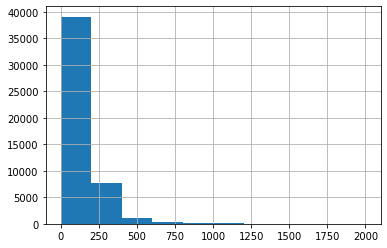

In [11]:
df.price.hist()

In [12]:
df.shape

(48769, 14)

graph for neighbourhood_group: total = 5


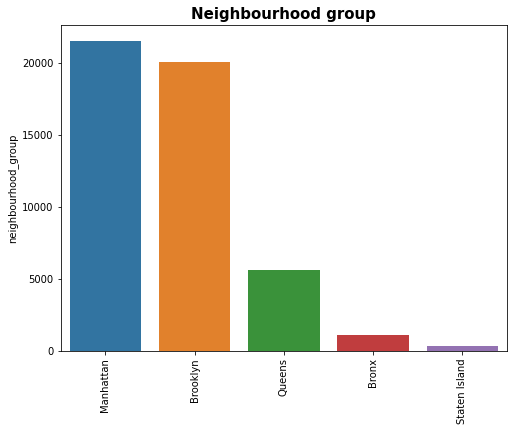

In [13]:
plt.figure(figsize=(8,6))
cat_num = df.neighbourhood_group.value_counts()
print("graph for %s: total = %d" % ('neighbourhood_group', len(cat_num)))
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Neighbourhood group',size=15, weight='bold')
plt.savefig('neighbourhood_group.png')
plt.show()

In [14]:
df.neighbourhood_group.value_counts()

Manhattan        21574
Brooklyn         20073
Queens            5661
Bronx             1089
Staten Island      372
Name: neighbourhood_group, dtype: int64

In [15]:
price_ne_group = pd.pivot_table(df, index = 'neighbourhood_group', values = 'price').sort_values('price', ascending = False)
dfi.export(price_ne_group, 'price_by_ne_group.png')
price_ne_group

price
neighbourhood_group            
Manhattan            184.176787
Brooklyn             119.679719
Staten Island        101.680108
Queens                96.258082
Bronx                 85.242424

graph for neighbourhood: total = 20


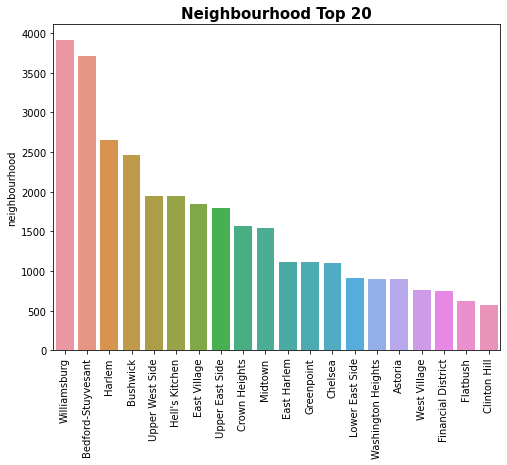

In [16]:
plt.figure(figsize=(8,6))
cat_num = df.neighbourhood.value_counts()[:20]
print("graph for %s: total = %d" % ('neighbourhood', len(cat_num)))
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Neighbourhood Top 20',size=15, weight='bold')
plt.savefig('neighbourhood.png')
plt.show()

In [17]:
pd.set_option('display.max_rows', None)
df.neighbourhood.value_counts()

Williamsburg                  3915
Bedford-Stuyvesant            3709
Harlem                        2654
Bushwick                      2462
Upper West Side               1952
Hell's Kitchen                1952
East Village                  1848
Upper East Side               1794
Crown Heights                 1562
Midtown                       1541
East Harlem                   1115
Greenpoint                    1114
Chelsea                       1106
Lower East Side                908
Washington Heights             898
Astoria                        898
West Village                   765
Financial District             743
Flatbush                       621
Clinton Hill                   569
Long Island City               536
Prospect-Lefferts Gardens      534
Park Slope                     505
East Flatbush                  499
Fort Greene                    489
Murray Hill                    484
Kips Bay                       469
Flushing                       426
Ridgewood           

In [18]:
pd.pivot_table(df, index = 'neighbourhood', values = 'price').sort_values('price', ascending = False)

price
neighbourhood                         
Fort Wadsworth              800.000000
Woodrow                     700.000000
Sea Gate                    487.857143
Prince's Bay                409.500000
Tribeca                     377.575581
Flatiron District           320.936709
NoHo                        295.717949
Midtown                     275.925373
Neponsit                    274.666667
SoHo                        268.402817
West Village                256.392157
Willowbrook                 249.000000
Riverdale                   236.300000
Theater District            232.265734
Chelsea                     228.737794
Greenwich Village           224.366925
Financial District          221.756393
Murray Hill                 217.283058
Breezy Point                213.333333
Cobble Hill                 211.929293
Battery Park City           210.134328
Gramercy                    209.199405
Brooklyn Heights            209.064935
Nolita                      200.080000
Hell's Kitchen              198.257172
Kips Bay                    196.976546
DUMBO                       196.305556
Civic Center                191.942308
Vinegar Hill                187.176471
Jamaica Estates             182.947368
Upper West Side             180.789447
Little Italy                180.166667
East Village                179.839827
Mill Basin                  179.750000
Upper East Side             178.209030
Boerum Hill                 176.135593
Carroll Gardens             175.914163
City Island                 173.000000
Arverne                     171.779221
Belle Harbor                171.500000
Park Slope                  171.461386
Stuyvesant Town             169.108108
Todt Hill                   169.000000
Far Rockaway                165.862069
Columbia St                 162.952381
Lower East Side             162.701542
Chinatown                   161.754768
Grymes Hill                 159.142857
Gowanus                     158.801619
Lighthouse Hill             157.500000
Prospect Heights            157.157746
Spuyten Duyvil              154.750000
Shore Acres                 152.714286
Navy Yard                   151.642857
Fort Greene                 151.374233
Downtown Brooklyn           150.349398
Clinton Hill                149.460457
South Slope                 146.725352
Tottenville                 144.857143
Red Hook                    143.455696
Bay Terrace                 142.000000
Eastchester                 141.692308
Eltingville                 141.666667
Williamsburg                141.637803
Castleton Corners           139.750000
Windsor Terrace             138.993631
Unionport                   137.142857
Greenpoint                  135.975763
Holliswood                  135.750000
Rockaway Beach              132.178571
Jamaica Hills               132.125000
Two Bridges                 127.069444
Flatlands                   126.433735
Long Island City            123.972015
Coney Island                123.705882
East Harlem                 122.676233
Westchester Square          122.200000
West Farms                  122.000000
Huguenot                    118.333333
St. George                  118.145833
Bay Ridge                   115.464286
Howard Beach                115.400000
Harlem                      115.008666
Arrochar                    115.000000
Morningside Heights         114.783237
Van Nest                    113.818182
Roosevelt Island            113.259740
Clason Point                112.761905
Kew Gardens Hills           112.307692
Rosebank                    111.857143
Crown Heights               109.679257
Middle Village              109.580645
Whitestone                  107.545455
Bergen Beach                106.700000
Forest Hills                106.041958
Briarwood                   105.875000
Prospect-Lefferts Gardens   105.842697
Pelham Bay                  105.000000
Canarsie                    104.367347
Astoria                     104.085746
Manhattan Beach             103.500000
Bedford-Stuyvesa

In [19]:
pd.pivot_table(df, index = ['neighbourhood_group', 'neighbourhood'], values = 'price').sort_values(['neighbourhood_group', 'price'])

price
neighbourhood_group neighbourhood                         
Bronx               Hunts Point                  50.500000
                    Tremont                      51.545455
                    Soundview                    53.466667
                    Bronxdale                    57.105263
                    Mount Eden                   58.500000
                    Woodlawn                     60.090909
                    Castle Hill                  63.000000
                    Olinville                    64.000000
                    Fordham                      68.467742
                    Parkchester                  69.076923
                    Schuylerville                69.230769
                    Morris Park                  69.333333
                    University Heights           69.571429
                    Highbridge                   71.111111
                    Concourse Village            73.781250
                    Fieldston                    75.083333
                    Baychester                   75.428571
                    Norwood                      75.548387
                    Morris Heights               76.941176
                    Belmont                      77.125000
                    Co-op City                   77.500000
                    Mount Hope                   77.500000
                    Kingsbridge                  77.928571
                    Port Morris                  79.891304
                    North Riverdale              79.900000
                    Edenwald                     82.000000
                    Melrose                      83.300000
                    Morrisania                   83.444444
                    East Morrisania              85.000000
                    Wakefield                    85.580000
                    Concourse                    86.180000
                    Claremont Village            87.464286
                    Allerton                     87.595238
                    Mott Haven                   88.916667
                    Throgs Neck                  91.041667
                    Longwood                     91.919355
                    Pelham Gardens               93.607143
                    Williamsbridge               96.750000
                    Pelham Bay                  105.000000
                    Clason Point                112.761905
                    Van Nest                    113.818182
                    West Farms                  122.000000
                    Westchester Square          122.200000
                    Unionport                   137.142857
                    Eastchester                 141.692308
                    Spuyten Duyvil              154.750000
                    City Island                 173.000000
                    Riverdale                   236.300000
Brooklyn            Borough Park                 63.066176
                    Bensonhurst                  75.786667
                    Brownsville                  76.900000
                    Gravesend                    79.014706
                    Midwood                      80.339450
                    Bath Beach                   81.764706
                    Bushwick                     84.018278
                    East New York                85.426606
                    East Flatbush                89.400802
                    Flatbush                     92.212560
                    Cypress Hills                92.552239
                    Kensington                   92.885714
                    Brighton Beach               93.175676
                    Dyker Heights                93.416667
                    Fort Hamilton                93.818182
                    Sheepshead Bay               94.153374
                    Sunset Park                 103.314433
                    Bedford-Stuyvesant          103.436775
                    Manhattan Beach      

graph for room_type: total = 3


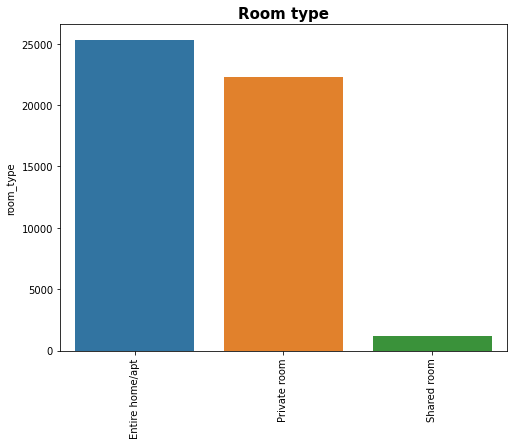

In [20]:
plt.figure(figsize=(8,6))
cat_num = df.room_type.value_counts()
print("graph for %s: total = %d" % ('room_type', len(cat_num)))
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Room type',size=15, weight='bold')
plt.savefig('room_type.png')
plt.show()

In [21]:
df.room_type.value_counts()

Entire home/apt    25312
Private room       22298
Shared room         1159
Name: room_type, dtype: int64

In [22]:
price_room_type = pd.pivot_table(df, index = 'room_type', values = 'price').sort_values('price', ascending = False)
dfi.export(price_room_type, 'price_by_room_type.png')
price_room_type

price
room_type                  
Entire home/apt  199.285912
Private room      86.365997
Shared room       70.075928

Text(0.5, 1.0, 'Room Type vs Price')

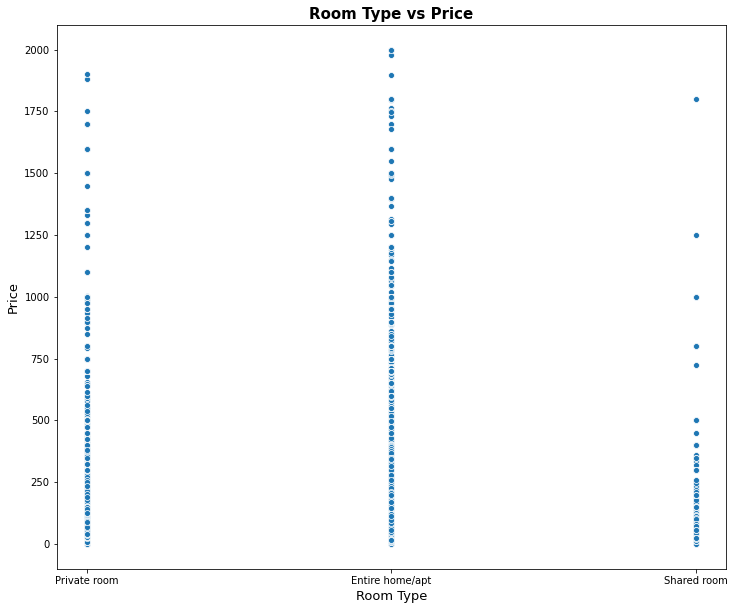

In [23]:
# Room Type vs Price(scatterplot)
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x='room_type', y='price')

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

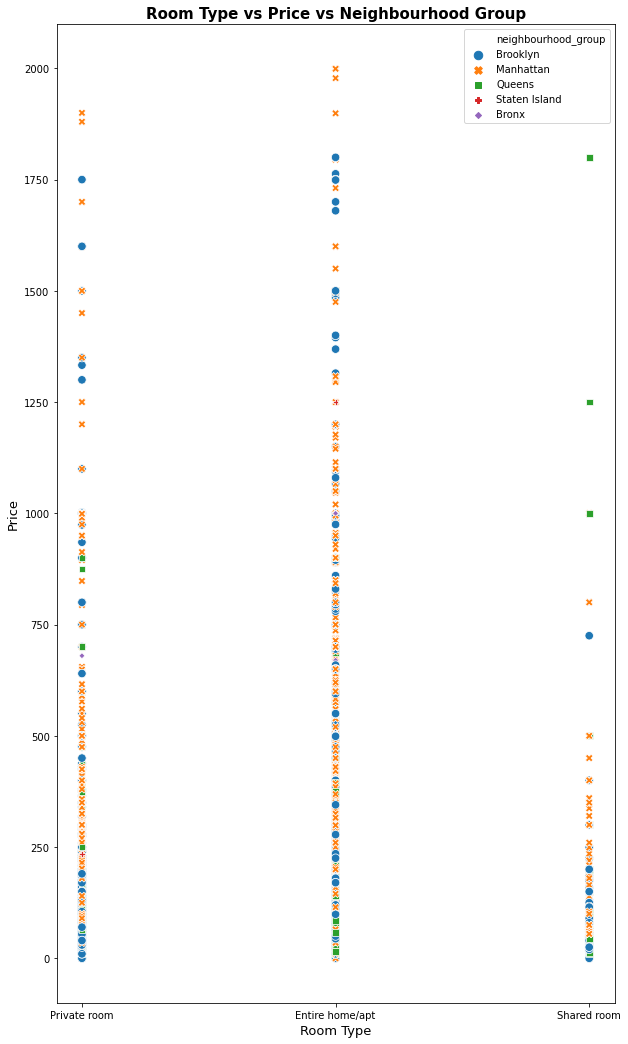

In [24]:
# Room Type vs Price vs Neighbourhood Group(scatterplot)
plt.figure(figsize=(10,18))
sns.scatterplot(data = df, x = 'room_type', y = 'price', 
                hue = 'neighbourhood_group', style = 'neighbourhood_group', size = 'neighbourhood_group')

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

In [25]:
# Correlations
corr = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_len']].corr()

In [26]:
corr

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.023342          -0.059174   
minimum_nights                  0.023342        1.000000          -0.081504   
number_of_reviews              -0.059174       -0.081504           1.000000   
reviews_per_month              -0.026062       -0.094858           0.530195   
calculated_host_listings_count  0.111224        0.132924          -0.072554   
availability_365                0.113560        0.146012           0.172904   
name_len                        0.085115        0.033506          -0.013099   

                                reviews_per_month  \
price                                   -0.026062   
minimum_nights                          -0.094858   
number_of_reviews                        0.530195   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.006777   
availability_365                         0.163790   
name_len                                 0.087625   

                                calculated_host_listings_count  \
price                                                 0.111224   
minimum_nights                                        0.132924   
number_of_reviews                                    -0.072554   
reviews_per_month                                    -0.006777   
calculated_host_listings_count                        1.000000   
availability_365                                      0.226292   
name_len                                              0.152458   

                                availability_365  name_len  
price                                   0.113560  0.085115  
minimum_nights                          0.146012  0.033506  
number_of_reviews                       0.172904 -0.013099  
reviews_per_month                       0.163790  0.087625  
calculated_host_listings_count          0.226292  0.152458  
availability_365                        1.000000  0.037365  
name_len                                0.037365  1.000000

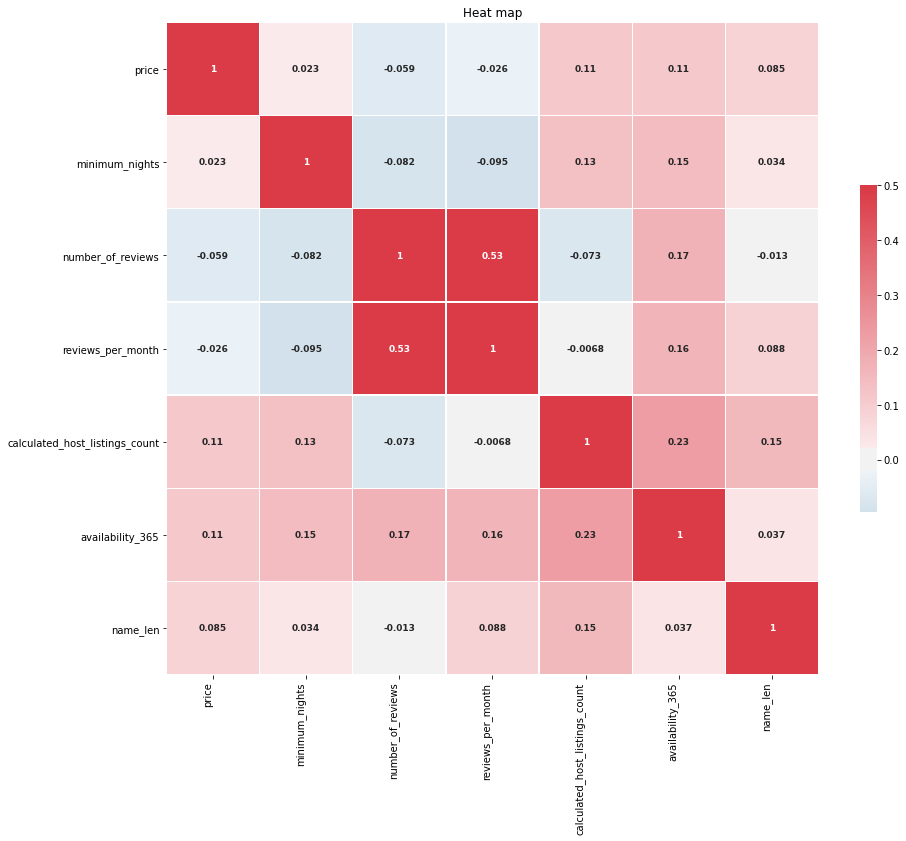

In [27]:
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax = sns.heatmap(corr, vmax=.5, center=0, cmap=cmap, square=True, linewidths=.5, 
                 cbar_kws={"shrink": .5}, annot=True, annot_kws={'size':9,'weight':'bold'})
#set format
label_y = ax.get_yticklabels()
plt.setp(label_y, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, horizontalalignment='right')
plt.title('Heat map')
plt.savefig('Correlations.png')
plt.show()

In [28]:
from wordcloud import WordCloud

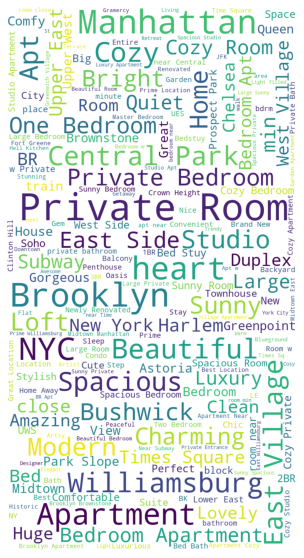

In [29]:
words = " ".join(df.name)

wc= WordCloud(background_color="white", random_state=1, width =800, height = 1500)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis('off')
plt.savefig('wordcloud_name.png')
plt.show()

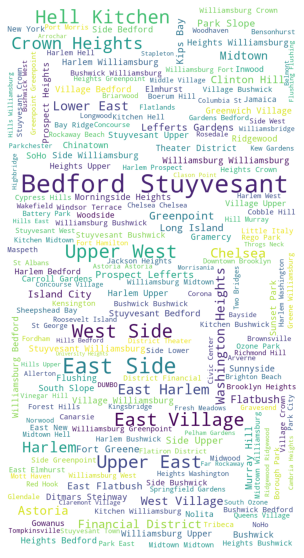

In [30]:
words = " ".join(df.neighbourhood)

wc= WordCloud(background_color="white", random_state=1, width =800, height = 1500)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis('off')
plt.savefig('wordcloud_neighbourhood.png')
plt.show()

In [31]:
df = df.drop(columns=['name', 'host_id', 'latitude','longitude'], axis = 1)

In [32]:
df.head()

neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9           0.210000                               6   
1                 45           0.380000                               2   
2                  0           1.373221                               1   
3                270           4.640000                               1   
4                  9           0.100000                               1   

   availability_365  name_len  
0               365        34  
1               355        21  
2               365        35  
3               194        31  
4                 0        48

In [33]:
df.shape

(48769, 10)

In [34]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_len'],
      dtype='object')

In [35]:
df.describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48769.000000    48769.000000       48769.000000       48769.000000   
mean     144.586356        6.971949          23.323833           1.374184   
std      133.753678       19.845928          44.594598           1.499059   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.280000   
50%      105.000000        3.000000           5.000000           1.220000   
75%      175.000000        5.000000          24.000000           1.590000   
max     1999.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365      name_len  
count                    48769.000000      48769.000000  48769.000000  
mean                         7.155222        112.613053     36.913306  
std                         32.993838        131.519584     10.489582  
min                          1.000000          0.000000      1.000000  
25%                          1.000000          0.000000     31.000000  
50%                          1.000000         45.000000     37.000000  
75%                          2.000000        226.000000     46.000000  
max                        327.000000        365.000000    179.000000

In [36]:
df.to_csv('eda_data.csv')